In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [26]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [29]:
last_12 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Dates: ", last_12)
last_12

Dates:  2016-08-23


datetime.date(2016, 8, 23)

In [30]:
prcp_q = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').all()

In [31]:
results = prcp_q

date = [result[0] for result in results]

prcp = [result[1] for result in results]

In [49]:
prcp_df = pd.DataFrame(prcp_q, columns=['Date', 'Prcp'])
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date

sorted_df = prcp_df.sort_values(by=['Date']).dropna()


sorted_df.head()

,Prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


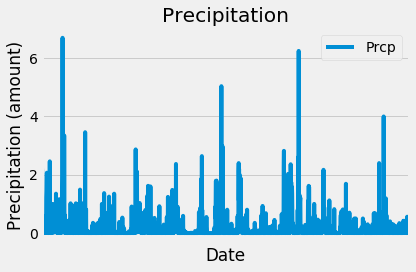

In [60]:
sorted_df.plot(xticks=[])
plt.title("Precipitation")
plt.ylabel("Precipitation (amount)")
plt.tight_layout()
plt.show()

In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [62]:
# Design a query to show how many stations are available in this dataset?
stn_count = [func.count(Station.id)]
    
stations = session.query(*stn_count).all()
stations

[(9)]

In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = session.query(Measurement.station, func.count(Measurement.tobs))
station_act = query.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
query_join = session.query(Station, Measurement).filter(Station.station == Measurement.station).all()

In [68]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp_calc = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station.contains('USC00519281')).all()
temp_calc

[(54.0, 85.0, 71.66378066378067)]

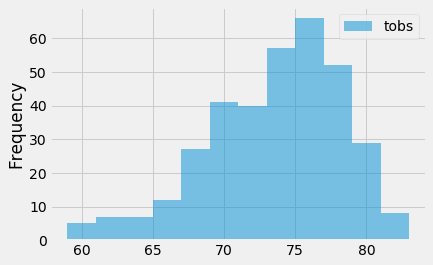

In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
WAIHEE_tobs = session.query(Measurement.tobs, Measurement.date).filter(
    Measurement.date > '2016-08-23',
    Measurement.station.contains('USC00519281')).all()

WAIHEE_tobs_df = pd.DataFrame(WAIHEE_tobs, columns=['tobs', 'date'])

WAIHEE_tobs_df.plot.hist(bins=12, alpha=0.5)
plt.show()

## Bonus Challenge Assignment

In [77]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
final_vacation_date = "2016-12-16"

# Previous Year Dates
initial_prevyear_date = "2015-12-01"
final_prevyear_date = "2015-12-16"

# Max, min and average calculation
min_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][0]
avg_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][1]
max_vacation_temp = calc_temps(initial_prevyear_date, final_prevyear_date)[0][2]

print(min_vacation_temp, avg_vacation_temp, max_vacation_temp)

65.0 73.41836734693878 82.0


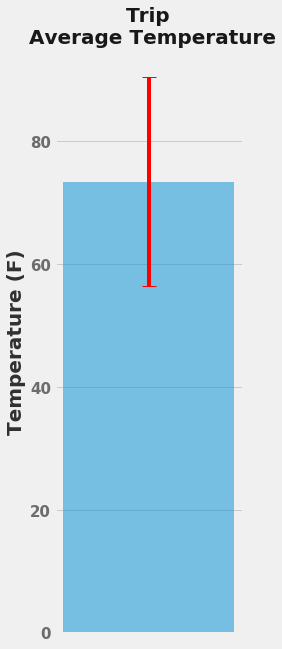

In [93]:
error_prev_year = max_vacation_temp-min_vacation_temp


plt.figure(figsize=[3,10]);

plt.bar(1, avg_vacation_temp, yerr=error_prev_year, align='center', alpha=0.5, 
        ecolor='red', capsize=7)


plt.ylabel('Temperature (F)',fontweight="bold", alpha=0.8, fontsize=20);
plt.xticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.yticks(fontsize=15, fontweight="bold", alpha=0.55);
plt.title('Trip\n Average Temperature',
          fontweight="bold", alpha=0.9, fontsize=20);
plt.grid(b=None, which='major', axis='x')

plt.tick_params(
    axis='x',          
    which='both',     
    bottom=False,     
    top=False,        
    labelbottom=False)

plt.show();

In [99]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station,  Station.name, Station.latitude, Station.longitude, Station.elevation).\
   filter(Station.station == Measurement.station).\
       filter(Measurement.date >= initial_prevyear_date).filter(Measurement.date <= final_prevyear_date).\
           group_by(Measurement.station).\
               order_by(Measurement.prcp.desc()).all()

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [100]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [102]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

startdate = '2018-01-01'
enddate = '2018-01-07'

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

dtobj = dt.datetime.strptime(startdate, '%Y-%m-%d')
enddtobj = dt.datetime.strptime(enddate, '%Y-%m-%d')

tripdates = []
normals =[]
while (dtobj <= enddtobj):
    tripdates.append(dt.datetime.strftime(dtobj,'%Y-%m-%d'))
    datestr = dt.datetime.strftime(dtobj,'%m-%d')
    normals.append(list(np.ravel(daily_normals(datestr))))
    dtobj = dtobj + dt.timedelta(days = 1)

normals

[[62.0, 69.15384615384616, 77.0],
 [60.0, 69.39622641509433, 77.0],
 [62.0, 68.9090909090909, 77.0],
 [58.0, 70.0, 76.0],
 [56.0, 67.96428571428571, 76.0],
 [61.0, 68.96491228070175, 76.0],
 [57.0, 68.54385964912281, 76.0]]

In [105]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

thistory = pd.DataFrame(normals, columns=['TMIN','TAVG','TMAX'])
thistory['Date'] = tripdates
thistory = thistory.set_index("Date")
thistory

,TMIN,TAVG,TMAX
Date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

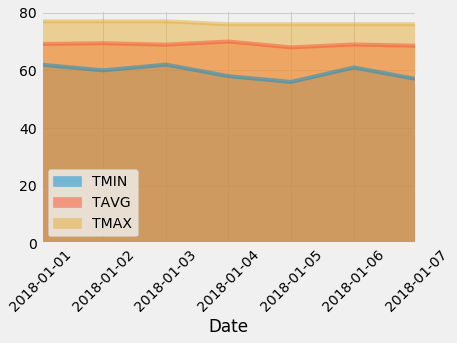

In [106]:
# Plot the daily normals as an area plot with `stacked=False`

thistory.plot.area(stacked=False)
plt.xticks(rotation=45)